# Linear Regression

# Boston - House dataset ---Linear Regression

Life circle process of machine learning---

1.Define libraries.define the matrics for whcih model is getting optimized

2.Data Cleansing and wrangling

3.Feature engineering

4.Data pre-processing

5.Feature selection

6.Split the data into training data and test data sets.

7.Model selection

8.model validation

9.interpret the results

In [187]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [188]:
from sklearn.datasets import load_boston

In [189]:
boston=load_boston()

In [190]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [191]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [325]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [193]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [326]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [195]:
bosdf=pd.DataFrame(boston.data)

In [196]:
bosdf

0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  
1    396.90  9.14  
2    392.83  4.03  
3    394.63  2.94  
4    396.90  5.33  
..      ...   ...  
501  391.99  9.67  
502  396.90  9.08  
503  396.90  5.64  
504  393.45  6.48  
505  396.90  7.88  

[506 rows x 13 columns]

In [197]:
pd.DataFrame?

In [198]:
bosdf=pd.DataFrame(boston.data,columns=boston.feature_names)

In [199]:
bosdf

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [200]:
bosdf['target']=pd.DataFrame(boston.target)

In [201]:
bosdf


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [202]:
bosdf.shape

(506, 14)

In [203]:
bosdf.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [204]:
bosdf.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [205]:
bosdf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

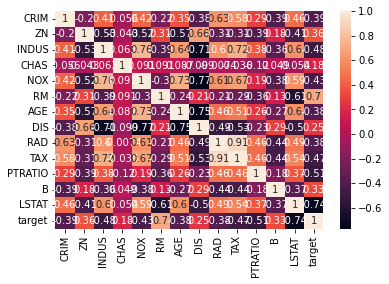

In [206]:
sns.heatmap(bosdf.corr(),annot=True)

In [207]:
x=bosdf.iloc[:,0:-1]

In [208]:
x

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [209]:
y=bosdf.iloc[:,-1]

In [210]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [212]:
x_train.shape

(404, 13)

In [213]:
x_test.shape

(102, 13)

In [214]:
y_train.shape

(404,)

In [215]:
y_test.shape

(102,)

In [216]:
lm=LinearRegression()

In [217]:
lm.fit(x_train,y_train)

LinearRegression()

In [218]:
lm.predict(x_test)

array([ 9.12748428, 23.22607405, 25.43491757, 21.93912106, 35.0369685 ,
       14.44312577, 19.79591821, 18.77273278, 28.44156211, 17.68287018,
       14.5256375 , 20.35917808, 36.71405377, 23.35328217, 16.54826432,
       20.19689993, 28.0798838 , 10.51707698, 15.84990687, 22.79978531,
       22.52370652, 14.30417843, 20.39530673, 32.36474494, 22.82740455,
       27.83092535, 22.78816748,  7.24982883, 26.26917604, 19.26831592,
       20.95945301,  8.19961959, 27.90281487, 24.70737329, 36.33336803,
       25.84140471, 39.67939605,  1.89495163, 31.689617  , 32.51199007,
       20.07027925, 22.08098494, 17.35207724, 31.24534056, 19.28880548,
       18.55920229, 28.64551588, 28.17392349, 18.86825378, 21.8492488 ,
       42.86548062, 16.54547858, 27.69001934, 34.95051186, 16.17280139,
       30.97283698,  5.66709669, 13.76589148, 18.68153774, 19.58681434,
       14.26309194, 18.40922544, 37.20641311, 35.26168168, 18.20084415,
       13.20954123, 38.61597545, 36.74307709, 14.72682328, 19.55

In [219]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [220]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [221]:
bos

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [222]:
bos.shape

(506, 13)

In [223]:
bos['target']=boston.target

In [224]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [225]:
bos

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [226]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [227]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

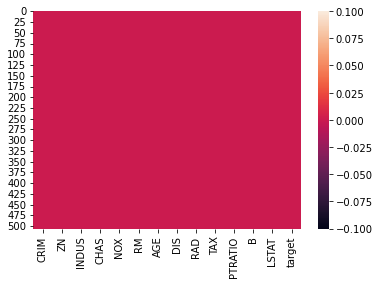

In [228]:
sns.heatmap(bos.isnull())

summary statistics

In [271]:
bos.describe()

CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  415.000000  415.000000  415.000000  415.0  415.000000  415.000000   
mean    -0.972062    9.602410   10.829687    0.0    0.547168    6.267554   
std      1.996482   19.677404    6.798613    0.0    0.110428    0.611602   
min     -5.064036    0.000000    0.460000    0.0    0.385000    4.368000   
25%     -2.513301    0.000000    5.130000    0.0    0.449000    5.886000   
50%     -1.553010    0.000000    8.560000    0.0    0.524000    6.193000   
75%      0.766450   12.500000   18.100000    0.0    0.609000    6.559500   
max      3.355356   80.000000   27.740000    0.0    0.871000    8.337000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  415.000000  415.000000  415.000000  415.000000  415.000000  415.000000   
mean    67.384337    3.852640    8.684337  393.853012   18.467952  374.235373   
std     28.072043    1.964763    8.196802  161.196133    2.137611   51.582784   
min      2.900000    1.169100    1.000000  188.000000   12.600000   83.450000   
25%     43.550000    2.203200    4.000000  279.000000   17.400000  377.880000   
50%     73.900000    3.377900    5.000000  315.000000   19.000000  392.630000   
75%     93.700000    5.287300    8.000000  437.000000   20.200000  396.900000   
max    100.000000    9.222900   24.000000  711.000000   21.200000  396.900000   

           target  
count  415.000000  
mean    22.353976  
std      8.077366  
min      5.600000  
25%     17.550000  
50%     21.200000  
75%     24.800000  
max     50.000000

In [272]:
bos.skew()

CRIM       0.520334
ZN         2.296827
INDUS      0.479840
CHAS       0.000000
NOX        0.883084
RM         0.629424
AGE       -0.540736
DIS        0.754011
RAD        1.267864
TAX        0.852698
PTRATIO   -0.823511
B         -3.809241
target     1.119814
dtype: float64

<AxesSubplot:>

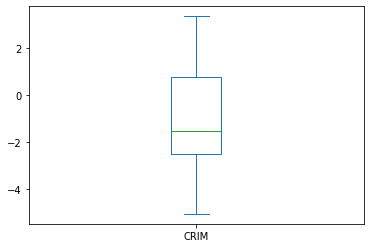

In [273]:
bos['CRIM'].plot.box()

<AxesSubplot:>

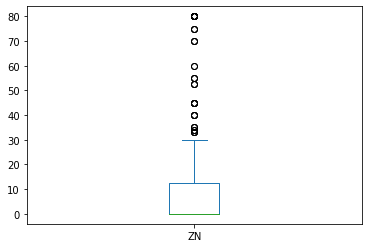

In [274]:
bos['ZN'].plot.box()

In [275]:
# box.plot?

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
target        AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

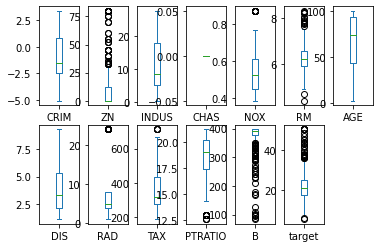

In [276]:
bos.plot(kind='box',subplots=True,layout=(2,7))

<AxesSubplot:>

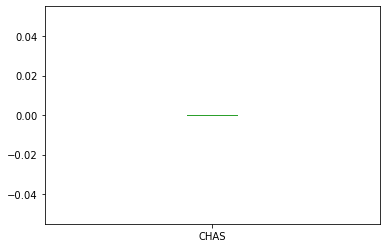

In [278]:
bos['CHAS'].plot.box()

In [327]:
#removing outliers

from scipy.stats import zscore
z=np.abs(zscore(bos))

z

CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
0    2.052067  0.427278  1.254663   NaN  0.083120  0.503296  0.077906   
1    1.318125  0.488581  0.553675   NaN  0.708718  0.251194  0.410713   
2    1.318493  0.488581  0.553675   NaN  0.708718  1.501880  0.224135   
3    1.232883  0.488581  1.273808   NaN  0.808451  1.195757  0.769819   
4    0.852958  0.488581  1.273808   NaN  0.808451  1.439673  0.470228   
..        ...       ...       ...   ...       ...       ...       ...   
501  0.901897  0.488581  0.162039   NaN  0.234212  0.532762  0.061190   
502  1.064679  0.488581  0.162039   NaN  0.234212  0.241550  0.332249   
503  0.917098  0.488581  0.162039   NaN  0.234212  1.159742  0.842267   
504  0.621314  0.488581  0.162039   NaN  0.234212  0.861804  0.781636   
505  1.041516  0.488581  0.162039   NaN  0.234212  0.388882  0.478478   

          DIS       RAD       TAX   PTRATIO         B    target  
0    0.120954  0.938612  0.607776  1.483794  0.439914  0.204028  
1    0.567909  0.816465  0.943176  0.312853  0.439914  0.093457  
2    0.567909  0.816465  0.943176  0.312853  0.360916  1.530316  
3    1.125951  0.694319  1.067398  0.108686  0.395854  1.369179  
4    1.125951  0.694319  1.067398  0.108686  0.439914  1.716245  
..        ...       ...       ...       ...       ...       ...  
501  0.700185  0.938612  0.750631  1.185952  0.344612  0.005705  
502  0.797567  0.938612  0.750631  1.185952  0.439914  0.217409  
503  0.858716  0.938612  0.750631  1.185952  0.439914  0.191633  
504  0.745895  0.938612  0.750631  1.185952  0.372950  0.043876  
505  0.686733  0.938612  0.750631  1.185952  0.439914  1.295793  

[415 rows x 13 columns]

In [309]:
# threshold for zscore -----> above 3 are considered outliers

threshold=3

print(np.where(z>3))

(array([ 39,  40,  54,  62,  63, 139, 140, 147, 151, 154, 174, 183, 183,
       184, 185, 186, 195, 198, 202, 203, 203, 221, 222, 223, 232, 232,
       243, 247, 248, 249, 255, 256, 257, 304, 312, 313, 322, 343, 344,
       345, 349, 350, 351, 352, 353, 354], dtype=int64), array([ 1,  1,  1,  1,  1, 11, 11, 11, 12, 12, 12,  1, 12,  1,  1,  1,  5,
       12,  5,  5, 12,  5,  1,  1,  5, 12,  1,  1,  1,  1,  1,  1,  1,  1,
       12, 12,  5, 11, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int64))


In [310]:
z.iloc[55][1]

0.7834455764003923

In [311]:
bos.skew()

CRIM       0.520334
ZN         2.296827
INDUS      0.479840
CHAS       0.000000
NOX        0.883084
RM         0.629424
AGE       -0.540736
DIS        0.754011
RAD        1.267864
TAX        0.852698
PTRATIO   -0.823511
B         -3.809241
target     1.119814
dtype: float64

<AxesSubplot:ylabel='Frequency'>

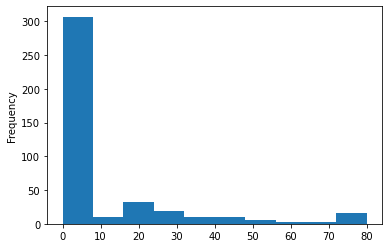

In [328]:
bos['ZN'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

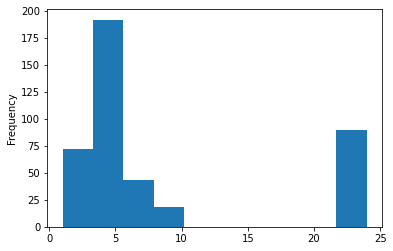

In [313]:
bos['RAD'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

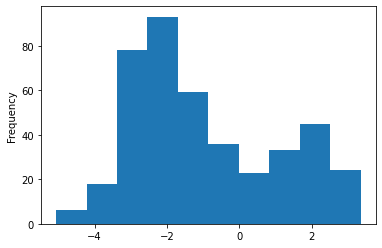

In [314]:
bos['CRIM'].plot.hist()

In [315]:
# bos['CRIM']=np.log(log['CRIM'])
# bos['CRIM'].plot.hist()

In [316]:
from scipy.stats import boxcox

# 0--> log transform
# .5---.square root transform
bos['CRIM']=boxcox(bos['CRIM'],0)

ValueError: Data must be positive.

<AxesSubplot:ylabel='Frequency'>

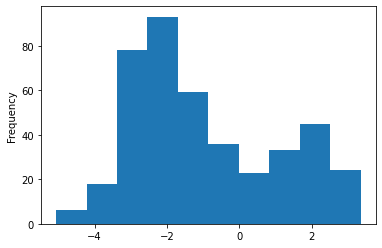

In [317]:
bos['CRIM'].plot.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

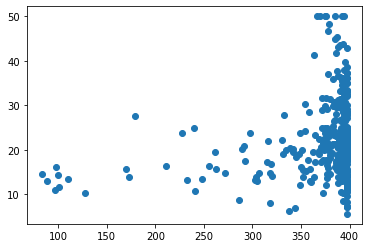

In [318]:
# bivariate means two variable

plt.scatter(bos['B'],bos['target'])

plt.show

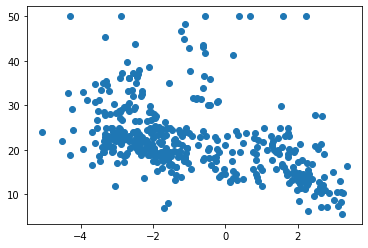

In [319]:
plt.scatter(bos['CRIM'],bos['target'])

<function matplotlib.pyplot.show(close=None, block=None)>

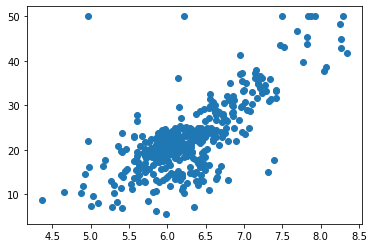

In [320]:
x=bos['RM']
y=bos['target']
plt.scatter(x,y)
plt.show

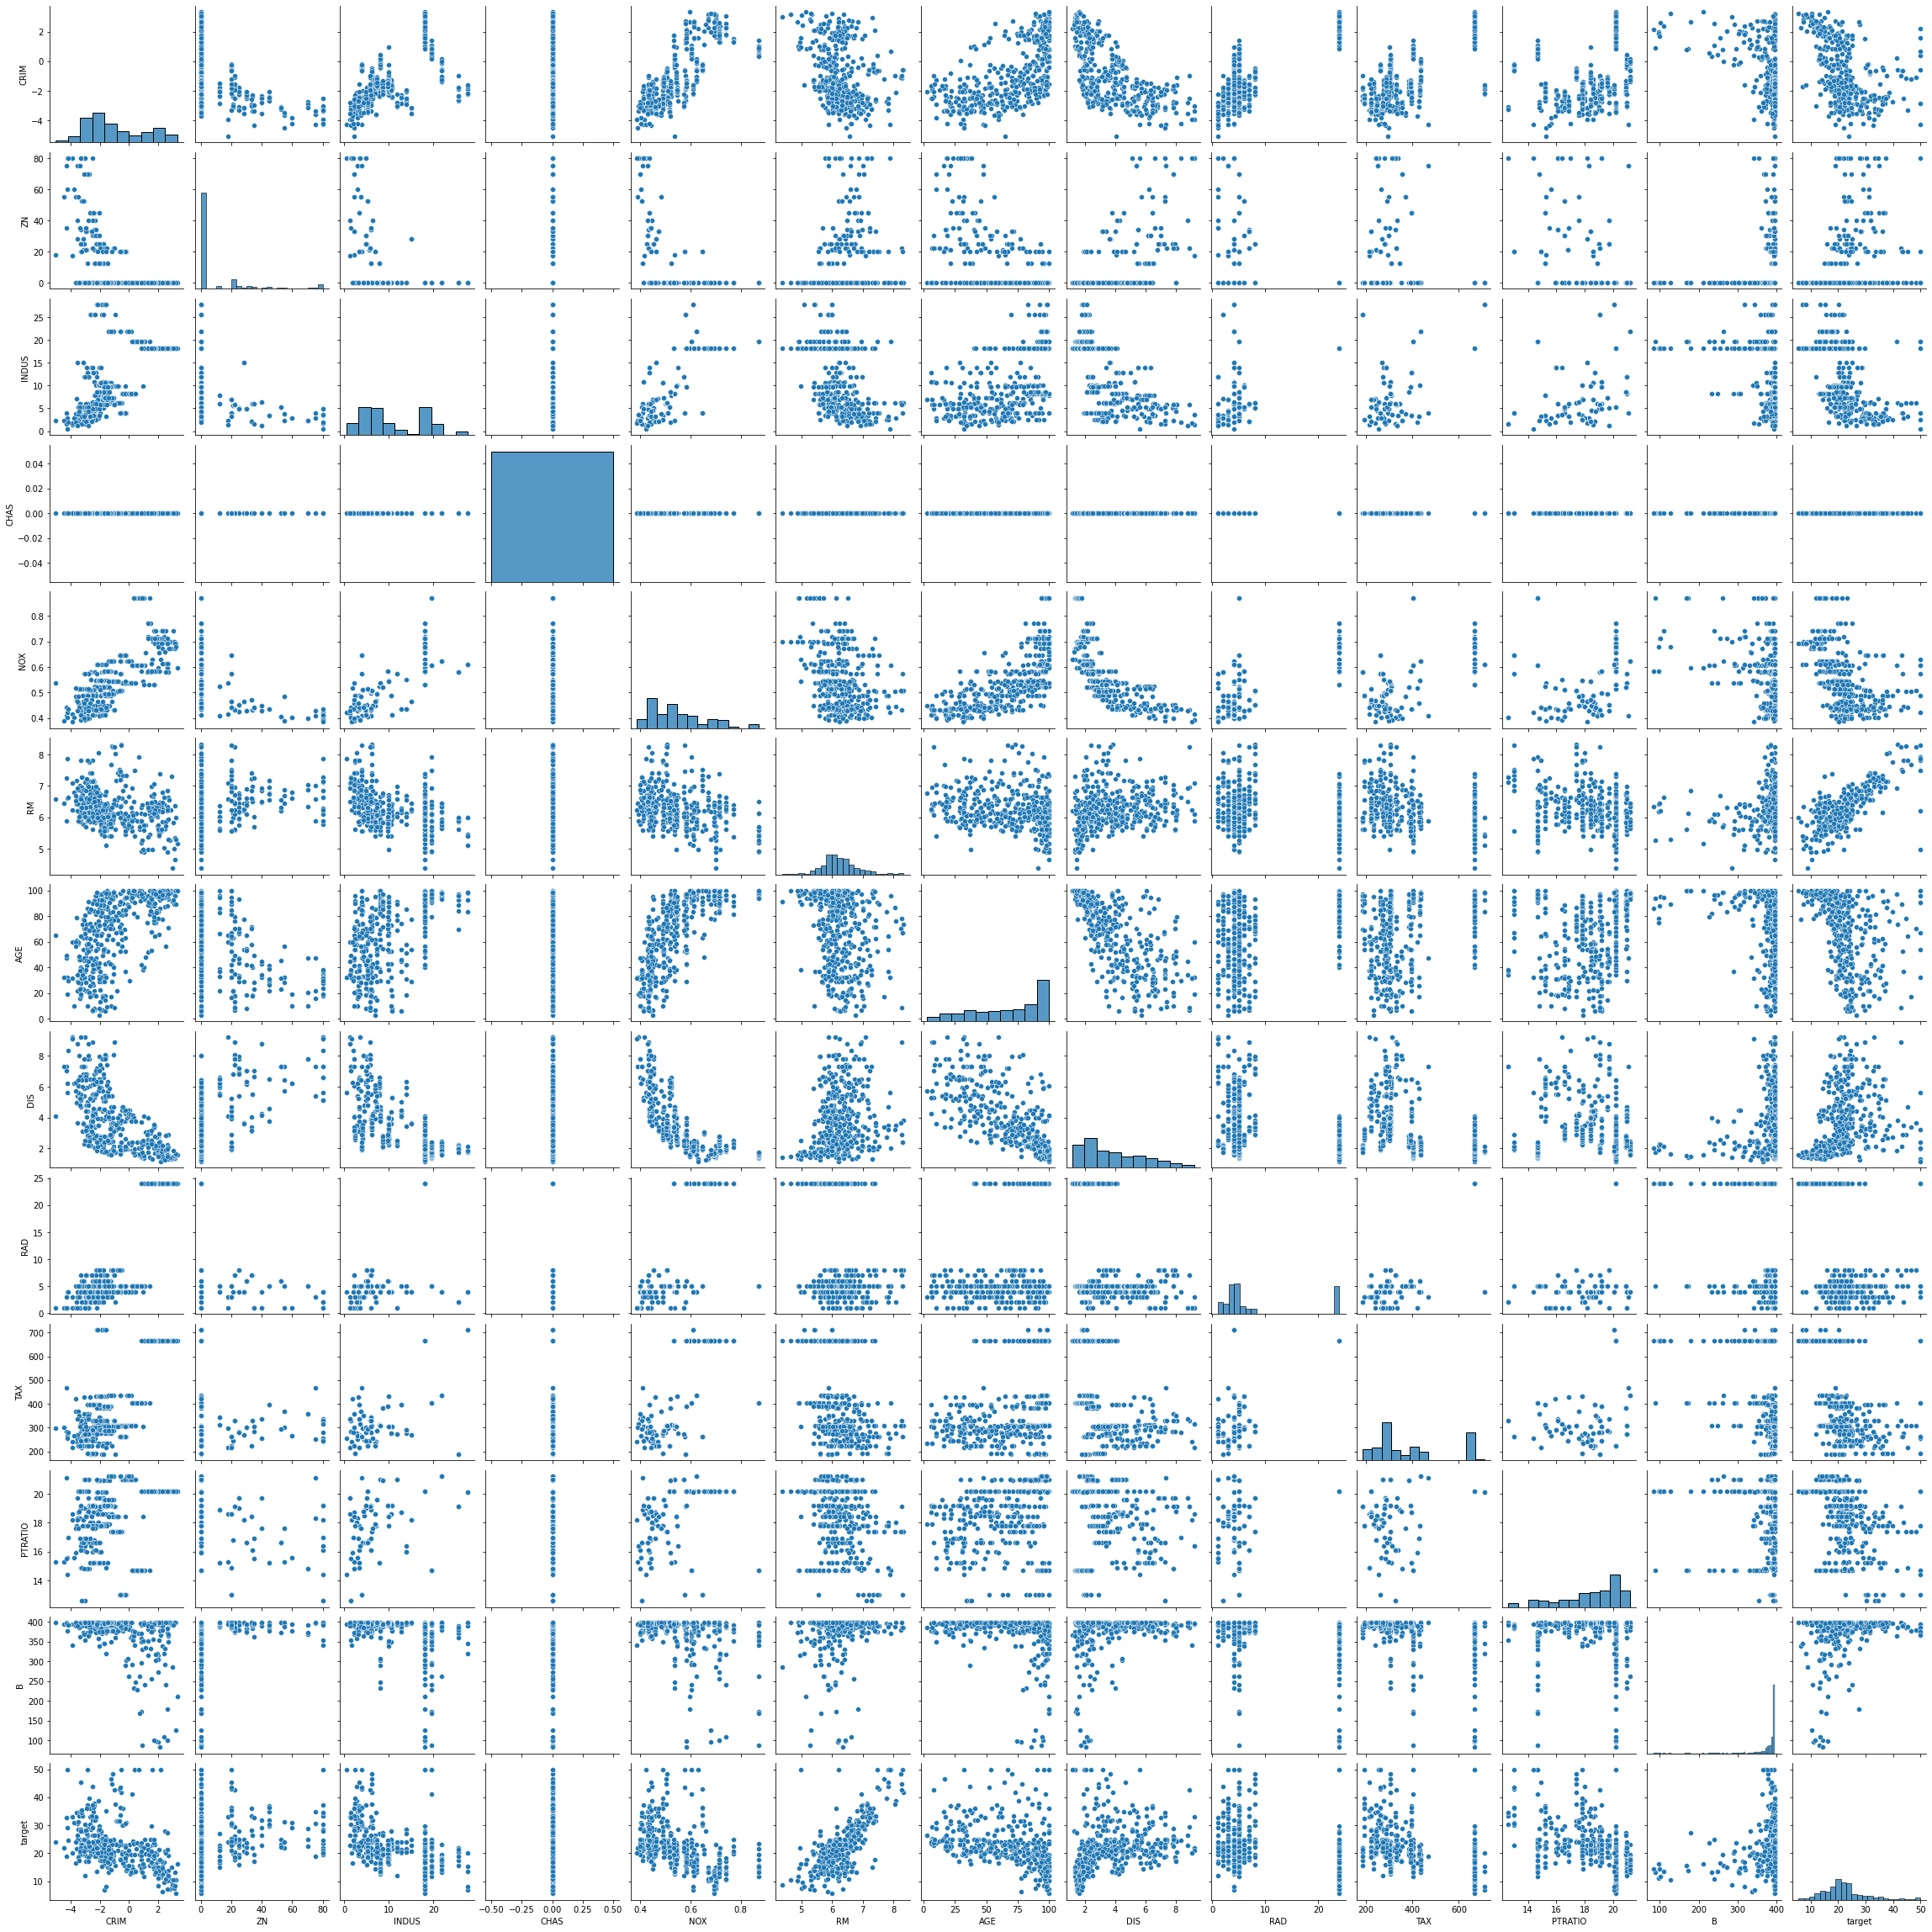

In [334]:
sns.pairplot(bos)

In [335]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [336]:
from sklearn.datasets import load_boston

In [337]:
# plt.figure?

<function matplotlib.pyplot.show(close=None, block=None)>

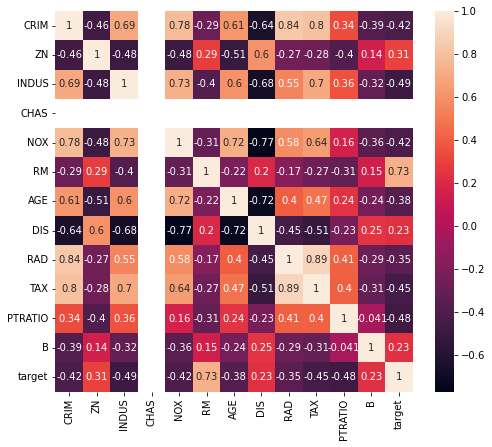

In [338]:
corr_hmap=bos.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show

In [330]:
plt.scatter(bos['target'],bos['LSTAT'])

KeyError: 'LSTAT'

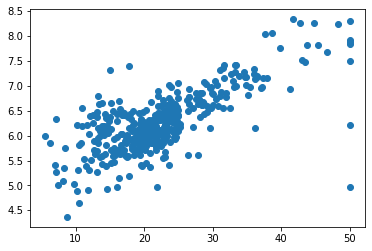

In [331]:
plt.scatter(bos['target'],bos['RM'])

In [332]:
# Drop the Lstat

bos.drop('LSTAT',axis=1,inplace=True)

KeyError: "['LSTAT'] not found in axis"

In [333]:
# Lstat dropped

bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0 -5.064036  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1 -3.600502   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2 -3.601235   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3 -3.430523   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4 -2.672924   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  target  
0     15.3  396.90    24.0  
1     17.8  396.90    21.6  
2     17.8  392.83    34.7  
3     18.7  394.63    33.4  
4     18.7  396.90    36.2

In [261]:
# Removing Outliers
bos_new=bos[(z<3).all(axis=1)]

In [262]:
bos.shape

(506, 13)

In [263]:
bos_new.shape

(415, 13)

In [264]:
bos=bos_new

In [265]:
bos.shape

(415, 13)

In [266]:
x=bos.iloc[:,-1]

In [267]:
x.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [268]:
x.shape

(415,)

In [269]:
y.shape

(506,)

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [415, 506]

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)